In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
print (tf.__version__)

2.0.0-rc1


In [3]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
#scale data
x_train = x_train/255
x_test = x_test/255
print (x_train.shape)

K = len(set(y_train))

(60000, 28, 28)


In [5]:
x_train_f = np.expand_dims(x_train,-1)
x_test_f = np.expand_dims(x_test,-1)
x_train_f.shape

(60000, 28, 28, 1)

In [6]:
#y_train = y_train.reshape(-1,1)
y_train.shape
#y_train[0]

(60000,)

In [7]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model

In [36]:
i = Input(shape=x_train_f[0].shape)
x = Conv2D(filters=8, kernel_size=(2,2), strides=2, activation='relu')(i)
x = Conv2D(filters=16, kernel_size=(2,2), strides=2, activation='relu')(i)
x = Conv2D(filters=32, kernel_size=(2,2), strides=2, activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(2,2), strides=2, activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(200, activation='relu')(x)
o = Dense(K, activation='softmax')(x)

model = Model(i,o)
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 16)        80        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 32)          2080      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 3, 64)          8256      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               1300

In [37]:
history = model.fit(x_train_f, y_train, epochs=15, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 7s 145us/sample - loss: 0.7956 - accuracy: 0.7115 - val_loss: 0.6382 - val_accuracy: 0.7588
Epoch 2/15
48000/48000 [==============================] - 7s 140us/sample - loss: 0.5688 - accuracy: 0.7889 - val_loss: 0.5311 - val_accuracy: 0.8023
Epoch 3/15
48000/48000 [==============================] - 7s 136us/sample - loss: 0.5180 - accuracy: 0.8067 - val_loss: 0.4972 - val_accuracy: 0.8142
Epoch 4/15
48000/48000 [==============================] - 7s 140us/sample - loss: 0.4861 - accuracy: 0.8178 - val_loss: 0.4816 - val_accuracy: 0.8159
Epoch 5/15
48000/48000 [==============================] - 6s 133us/sample - loss: 0.4576 - accuracy: 0.8284 - val_loss: 0.4743 - val_accuracy: 0.8217
Epoch 6/15
48000/48000 [==============================] - 7s 140us/sample - loss: 0.4358 - accuracy: 0.8359 - val_loss: 0.4621 - val_accuracy: 0.8292
Epoch 7/15
48000/48000 [==========================

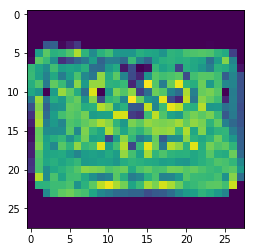

predicted label is: 8
actual label is: 8


In [30]:
import matplotlib.pyplot as plt

imgNum = np.random.randint(0,1000)
plt.imshow(x_test_f[imgNum].reshape(28,28))
plt.show()

tstimg = x_test_f[imgNum].reshape(1,28,28,1)
predlbl = model.predict(tstimg)
print ('predicted label is:', predlbl.argmax())
print ('actual label is:',y_test[imgNum])

9

9